<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/supervised-learning/supervised_learning_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with scikit-learn

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from scipy.stats import randint
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix


plt.style.use('ggplot')
sns.set()

print(f'sklearn: {sklearn.__version__}')

sklearn: 0.22.1


In [2]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
iris.data.shape

(150, 4)

In [6]:
print(iris.target_names[np.unique(iris.target)])

['setosa' 'versicolor' 'virginica']


## Exploratory data analysis (EDA)

In [7]:
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.index

RangeIndex(start=0, stop=150, step=1)

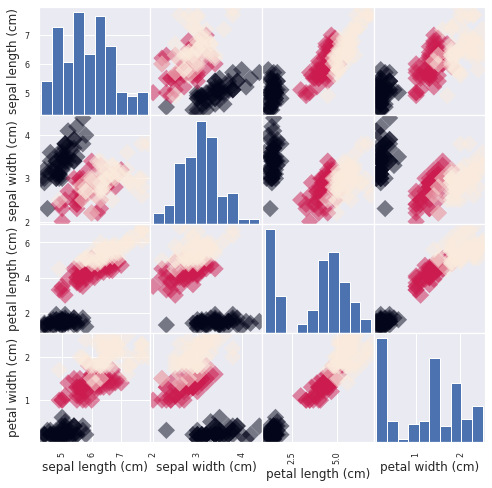

In [9]:
scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D');

In [10]:
columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
us_congressional_voting_1984_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/house-votes-84.csv'
df = pd.read_csv(us_congressional_voting_1984_url, names=columns)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [11]:
df.replace({'?': 'n'}, regex=False, inplace=True)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n
2,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,n,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


In [12]:
df.replace({'y': 1, 'n': 0}, inplace=True)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


In [14]:
df.shape

(435, 17)

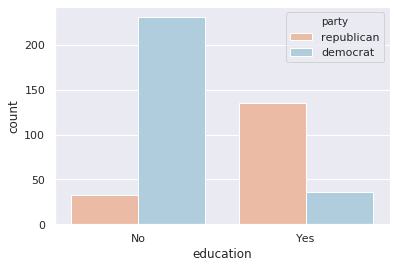

In [15]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show();

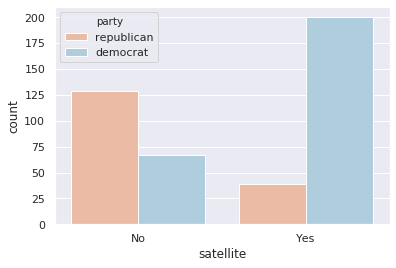

In [16]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show();

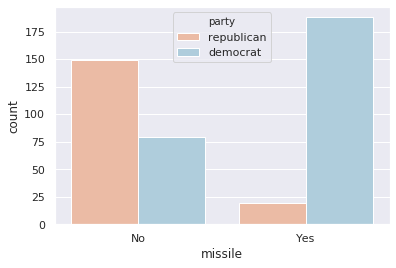

In [17]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show();

## Using scikit-learn to fit a classifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris.data, iris.target)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [19]:
X = df.drop('party', axis=1)
y = df['party']

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [20]:
X_new = np.array([[0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106, 0.980764,
         0.68483, 0.480932, 0.392118, 0.343178, 0.72905, 0.438572, 0.059678,
         0.398044, 0.737995]])
knn.predict(X_new)

array(['democrat'], dtype=object)

## Measuring model performance

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
X_train, X_test, y_train, y_test

(     infants  water  budget  ...  crime  duty_free_exports  eaa_rsa
 426        1      0       1  ...      0                  1        1
 361        1      0       1  ...      1                  0        0
 13         1      1       1  ...      0                  1        0
 97         1      0       0  ...      1                  0        1
 237        1      0       1  ...      0                  0        1
 ..       ...    ...     ...  ...    ...                ...      ...
 48         1      1       1  ...      1                  0        1
 127        0      0       1  ...      1                  1        1
 341        0      0       1  ...      0                  1        1
 6          0      1       0  ...      1                  1        1
 22         1      0       1  ...      0                  1        1
 
 [304 rows x 16 columns],
      infants  water  budget  ...  crime  duty_free_exports  eaa_rsa
 391        1      1       0  ...      0                  1        0
 156  

In [22]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Test set predictions:', y_pred)



Test set predictions: ['democrat' 'republican' 'republican' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'republican' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 

In [23]:
knn.score(X_test, y_test)

0.9541984732824428

## The digits recognition dataset

In [24]:
digits = datasets.load_digits()
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

In [25]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


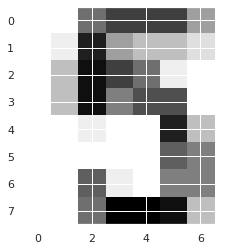

In [26]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest');

In [27]:
digits.target[1010]

5

In [28]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))


0.9833333333333333


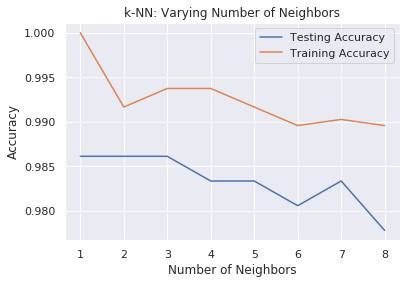

In [29]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show();


## Regression

In [30]:
boston_housing_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/boston.csv'
boston = pd.read_csv(boston_housing_url)
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [31]:
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']
print('X shape:', X.shape)
X_rooms = X['RM'].values.reshape(-1,1)
print('X_rooms shape:', X_rooms.shape)
type(X_rooms), type(y)

X shape: (506, 13)
X_rooms shape: (506, 1)


(numpy.ndarray, pandas.core.series.Series)

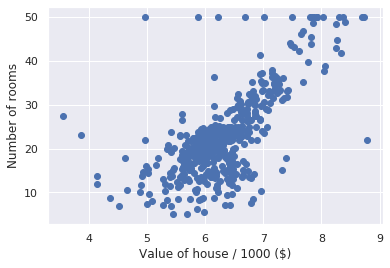

In [32]:
plt.scatter(X_rooms, y)
plt.xlabel('Value of house / 1000 ($)')
plt.ylabel('Number of rooms')
plt.show();

In [33]:
reg = LinearRegression()
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

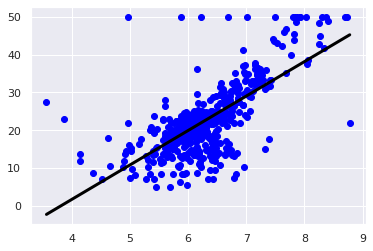

In [35]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3);

## Gapminder

In [36]:
gapminder_ds_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/gm_2008_region.csv'
gapminder_df = pd.read_csv(gapminder_ds_url)

gapminder_df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [37]:
gapminder_df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [38]:
gapminder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [39]:
try:
  gapminder_df = gapminder_df.drop('Region', axis=1)
except:
  print('<Region> feaute was not present on DF.')
gapminder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
dtypes: float64(9)
memory usage: 9.9 KB


In [40]:
X = gapminder_df['fertility'].values.reshape(-1, 1)
y = gapminder_df['life']

X.shape, y.shape

((139, 1), (139,))

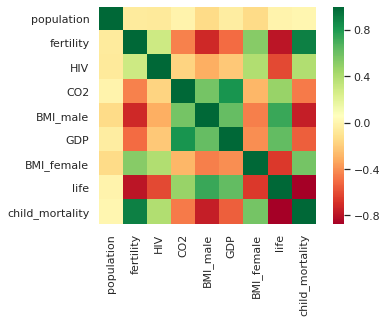

In [41]:
sns.heatmap(gapminder_df.corr(), square=True, cmap='RdYlGn');

## Fit & predict for regression

In [0]:
X_fertility = X

0.6192442167740035


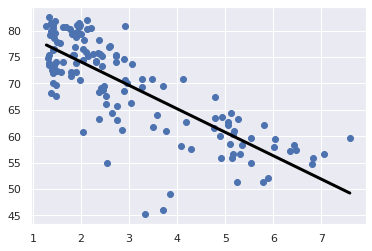

In [43]:
reg = LinearRegression()
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)
reg.fit(X_fertility, y)
y_pred = reg.predict(prediction_space)
print(reg.score(X_fertility, y))

plt.scatter(X_fertility, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3);

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


## 5-fold cross-validation

In [45]:
gapminder_ds_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/gm_2008_region.csv'
df = pd.read_csv(gapminder_ds_url)

try:
  df = df.drop('Region', axis=1)
except:
  print('<Region> feaute was not present on DF.')

X = df.drop(['life'], axis=1)
y = df['life']

X.shape, y.shape

((139, 8), (139,))

In [46]:
reg = LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv=5)
print(cv_scores)
print(f'Average 5-fold CV Score: {cv_scores.mean()}')

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-fold CV Score: 0.8599627722793229


## K-fold CV comparison

In [0]:
gapminder_ds_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/gm_2008_region.csv'
df = pd.read_csv(gapminder_ds_url)

try:
  df = df.drop('Region', axis=1)
except:
  print('<Region> feaute was not present on DF.')

X = df.drop(['life'], axis=1)
y = df['life']
reg = LinearRegression()

In [48]:
%%time
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

0.8718712782622106
CPU times: user 15.6 ms, sys: 3.08 ms, total: 18.7 ms
Wall time: 17.6 ms


In [49]:
%%time
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8436128620131204
CPU times: user 36.3 ms, sys: 0 ns, total: 36.3 ms
Wall time: 38.1 ms


## Regularized regression

### Regulatization I: Lasso


In [0]:
gapminder_ds_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/gm_2008_region.csv'
df = pd.read_csv(gapminder_ds_url)

try:
  df = df.drop('Region', axis=1)
except:
  print('<Region> feaute was not present on DF.')

X = df.drop(['life'], axis=1)
y = df['life']

df_columns =df.drop(['life'], axis=1).columns

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


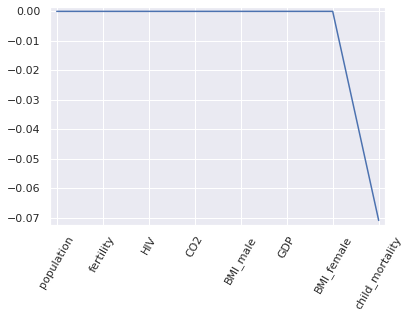

In [51]:
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X, y)
lasso_coef = lasso.coef_
print(lasso_coef)
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02);

## Regularization II: Ridge

In [0]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log');

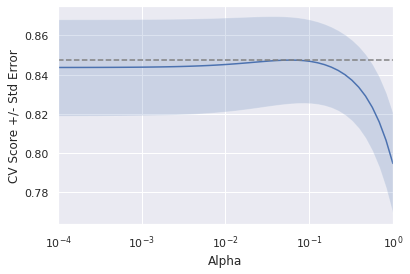

In [53]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

for alpha in alpha_space:
  ridge = Ridge(alpha=alpha, normalize=True)
  ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
  ridge_scores.append(np.mean(ridge_cv_scores))
  ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)

## Metrix for classification

In [0]:
diabetes_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/pima_indians_diabetes.csv'
df = pd.read_csv(diabetes_url)
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



In [56]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


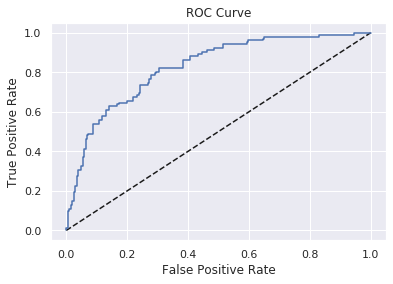

In [57]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');


## AUC computation

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal.

In [58]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8260517799352751
AUC scores computed using 5-fold cross-validation: [0.80814815 0.80777778 0.82666667 0.87471698 0.83377358]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [59]:
# setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# instantiate the gridsearchcv object
logreg_cv = GridSearchCV(logreg, param_grid,cv =5)
logreg_cv.fit(X, y)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
Best score is 0.7734997029114676


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [60]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': [3, None],
              'max_features': randint(1, 9),
              'min_samples_leaf': randint(1, 9),
              'criterion': ['gini', 'entropy']}
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)
print('Tuned Decision Tree Parameters: {}'.format(tree_cv.best_params_))
print('Best score is {}'.format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7}
Best score is 0.730532212885154


## Hold-out set in practice I: Classification

In [61]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty' : ['l1', 'l2']}
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_m

Tuned Logistic Regression Parameter: {'C': 163789.3706954068, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7782608695652173


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Hold-out set in practice II: Regression

Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

a∗L1+b∗L2
In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.


In [62]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.733018591571295, tolerance: 0.008436684782608695
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.920050137052513, tolerance: 0.008285869565217392
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.69617864870427, tolerance: 0.008673913043478266
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.24765337510702734
Tuned ElasticNet MSE: 0.16664179543611005


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.87629751791531, tolerance: 0.01060956521739131
  positive)


## Exploring categorical features

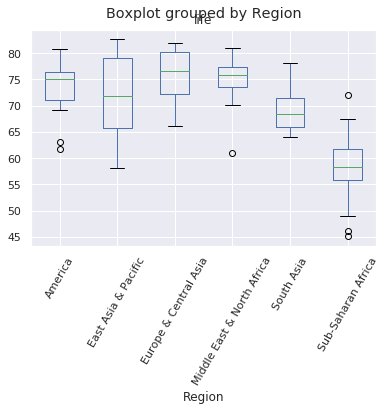

In [63]:
gapminder_ds_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/gm_2008_region.csv'
df = pd.read_csv(gapminder_ds_url)

df.boxplot('life', 'Region', rot=60);


In [0]:

X = df.drop(['life'], axis=1)
y = df['life']

df_columns =df.drop(['life'], axis=1).columns

### Creating dummy variables

In [65]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Region']),
    remainder='passthrough'
)
pipe = make_pipeline(column_trans)
pipe.fit_transform(df)

array([[  0.    ,   0.    ,   0.    , ..., 129.9049,  75.3   ,  29.5   ],
       [  0.    ,   0.    ,   0.    , ..., 130.1247,  58.3   , 192.    ],
       [  1.    ,   0.    ,   0.    , ..., 118.8915,  75.5   ,  15.4   ],
       ...,
       [  0.    ,   1.    ,   0.    , ..., 121.9367,  75.4   ,  26.2   ],
       [  0.    ,   0.    ,   0.    , ..., 132.4493,  52.    ,  94.9   ],
       [  0.    ,   0.    ,   0.    , ..., 131.9745,  49.    ,  98.3   ]])

In [66]:
# Drop first
column_trans = make_column_transformer(
    (OneHotEncoder(drop='first'), ['Region']),
    remainder='passthrough'
)
ridge = Ridge(alpha=0.5, normalize=True)
pipe = make_pipeline(column_trans, ridge)
cross_val_score(pipe, X, y, cv=5)


array([0.86808336, 0.80623545, 0.84004203, 0.7754344 , 0.87503712])

## Handling missing data

In [67]:
diabetes_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/pima_indians_diabetes.csv'
df = pd.read_csv(diabetes_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
def start_pipeline(df):
  return df.copy()

def fill_missing_data_with_nan(df, columns):
  for col in columns:
    df[col].replace(0, np.nan, inplace=True)
  return df

def impute_missing_data(df):
  imp = SimpleImputer(missing_values=np.nan, strategy='mean')
  return imp.fit_transform(df)

clean_df = (df
 .pipe(start_pipeline)
 .pipe(fill_missing_data_with_nan, 
       columns=['Insulin', 'SkinThickness', 'BMI'])
 .pipe(impute_missing_data)
)
clean_df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [69]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logreg = LogisticRegression(penalty='l2')
steps = [
  ('imputation', imp),
  ('logistic_regression', logreg)       
]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)
pipeline.fit(X_train, y_train)
#y_pred = pipeline.score(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('imputation',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('logistic_regression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [70]:
columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
us_congressional_voting_1984_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/house-votes-84.csv'
df = pd.read_csv(us_congressional_voting_1984_url, names=columns)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [71]:
# convert '?' to NaN
df_drop_na = df.copy()

df_drop_na[df_drop_na == '?'] = np.nan
print(df_drop_na.isnull().sum())
print(df_drop_na.isna().sum())
print(f'Shape of the original DataFrame: {df_drop_na.shape}')
df_drop_na = df_drop_na.dropna()
print('Shape of DataFrame After Dropping All Rows with Missing Values:', df_drop_na.shape)


party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of the original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


In [81]:
df[df == '?'] = np.nan
df = df.replace({'y': 1.0, 'n': 0.0})

X = df.drop(['party'], axis=1)
y = df['party']

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
clf = SVC()

steps = [
  ('imputation', imp), 
  ('SVM', clf)
]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
classification_report(y_test, y_pred)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


'              precision    recall  f1-score   support\n\n    democrat       0.98      0.96      0.97        85\n  republican       0.94      0.96      0.95        46\n\n    accuracy                           0.96       131\n   macro avg       0.96      0.96      0.96       131\nweighted avg       0.96      0.96      0.96       131\n'

## Centering and Scaling

In [83]:
white_wine_quality_ds = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/winequality_white.csv'
df = pd.read_csv(white_wine_quality_ds)
df.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [88]:
X = df.drop(['quality'], axis=1)
y = df['quality']

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print('Mean of Unscaled Features: {}'.format(X.mean())) 
print('Standard Deviation of Unscaled Features: {}'.format(X.std()))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(X_scaled.mean())) 
print("Standard Deviation of Scaled Features: {}".format(X_scaled.std()))

Mean of Scaled Features: 2.739937614267761e-15
Standard Deviation of Scaled Features: 0.9999999999999999


In [93]:
steps = [
  ('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier())
]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)
knn_scaled = pipeline.fit(X_train, y_train)
# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5496598639455782
Accuracy without Scaling: 0.47551020408163264


In [99]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C': [1, 10, 100],
              'SVM__gamma': [0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.6081632653061224
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.24      0.39      0.30        28
           5       0.61      0.62      0.61       289
           6       0.66      0.66      0.66       447
           7       0.62      0.54      0.58       177
           8       0.47      0.42      0.44        38

    accuracy                           0.61       980
   macro avg       0.43      0.44      0.43       980
weighted avg       0.61      0.61      0.61       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}
